In [1]:
import numpy as np
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
from Capacity import *
from Modulation import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Gaussian inputs, capacity test

In [2]:
# SNR range (dB)
SNR_start, SNR_step, SNR_end = -10, 1, 30
SNR_range = np.arange(SNR_start, SNR_end, SNR_step)

capacity_awgn = Gaussian_Capacity('awgn', SNR_range)
capacity_rayleigh = Gaussian_Capacity('rayleigh', SNR_range, sim_num=10000)

40it [00:00, 5560.71it/s]


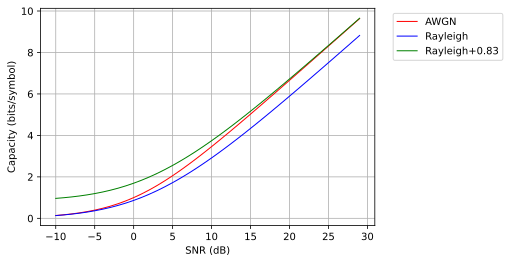

In [3]:
fig = plt.figure()
plt.grid()

plt.plot(
    SNR_range,
    capacity_awgn,
    linewidth=1.0,
    linestyle="-",
    color="r",
    label="AWGN",
)
plt.plot(
    SNR_range,
    capacity_rayleigh,
    linewidth=1.0,
    linestyle="-",
    color="b",
    label="Rayleigh",
)
plt.plot(
    SNR_range,
    capacity_rayleigh+0.83,
    linewidth=1.0,
    linestyle="-",
    color="g",
    label="Rayleigh+0.83",
)
plt.xlabel("SNR (dB)")
plt.ylabel("Capacity (bits/symbol)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#### CM capacity test

In [4]:
symbols_bpsk, labels_bpsk = PSK(2)
symbols_qpsk, labels_qpsk = PSK(4)

chan_type = "awgn"

# SNR range (dB)
SNR_start, SNR_step, SNR_end = -10, 1, 30
SNR_range = np.arange(SNR_start, SNR_end, SNR_step)

ssd = (False, 0)

# number of MC simulations
sim_num = 1000000

capacity_bpsk = CM_Capacity(symbols_bpsk, chan_type, SNR_range, ssd, sim_num)
capacity_qpsk = CM_Capacity(symbols_qpsk, chan_type, SNR_range, ssd, sim_num)

40it [00:00, 799.53it/s]
40it [00:00, 219.95it/s]


In [5]:
sym_dim = 2 if np.imag(symbols_bpsk).any() else 1
print(sym_dim)

1


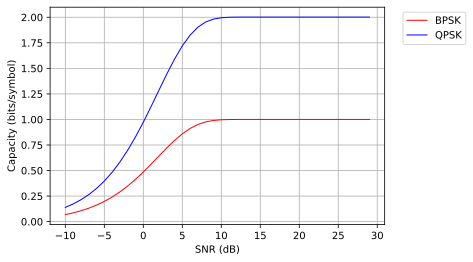

In [6]:
fig = plt.figure()
plt.grid()

plt.plot(
    SNR_range,
    capacity_bpsk,
    linewidth=1.0,
    linestyle="-",
    color="r",
    label="BPSK",
)
plt.plot(
    SNR_range,
    capacity_qpsk,
    linewidth=1.0,
    linestyle="-",
    color="b",
    label="QPSK",
)
plt.xlabel("SNR (dB)")
plt.ylabel("Capacity (bits/symbol)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#### Capacity vs. EbN0

In [7]:
EbN0_bpsk = snr2ebn0(SNR_range, capacity_bpsk, 1)
EbN0_qpsk = snr2ebn0(SNR_range, capacity_qpsk)
EbN0_gaussian = snr2ebn0(SNR_range, capacity_awgn)

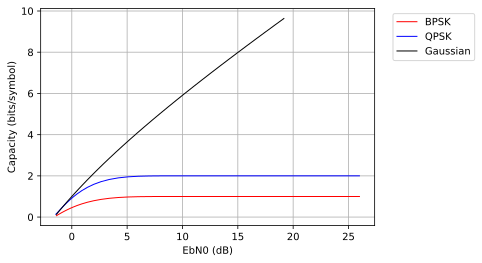

In [8]:
fig = plt.figure()
plt.grid()

plt.plot(
    EbN0_bpsk,
    capacity_bpsk,
    linewidth=1.0,
    linestyle="-",
    color="r",
    label="BPSK",
)
plt.plot(
    EbN0_qpsk,
    capacity_qpsk,
    linewidth=1.0,
    linestyle="-",
    color="b",
    label="QPSK",
)
plt.plot(
    EbN0_gaussian,
    capacity_awgn,
    linewidth=1.0,
    linestyle="-",
    color="k",
    label="Gaussian",
)
plt.xlabel("EbN0 (dB)")
plt.ylabel("Capacity (bits/symbol)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

#### BICM capacity test

In [9]:
M = 4
symbols, labels_gray = PSK(M, labeling="gray")
_, labels_bin = PSK(M, labeling="bin")

chan_type = "awgn"

# SNR range
SNR_start, SNR_step, SNR_end = -10, 1, 30
SNR_range = np.arange(SNR_start, SNR_end, SNR_step)

# number of MC simulations
sim_num = 100000

ssd = (False, 0)

_, capacity_gray = BICM_Capacity(symbols, labels_gray, chan_type, SNR_range, ssd, sim_num)
_, capacity_bin = BICM_Capacity(symbols, labels_bin, chan_type, SNR_range, ssd, sim_num)

40it [00:00, 439.71it/s]
40it [00:00, 433.97it/s]


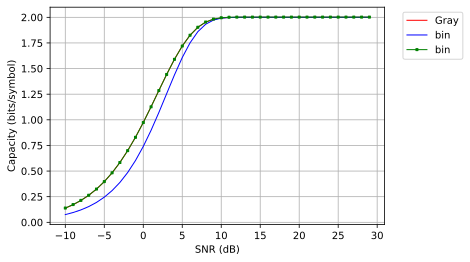

In [10]:
fig = plt.figure()
plt.grid()

plt.plot(
    SNR_range,
    capacity_gray,
    linewidth=1.0,
    linestyle="-",
    color="r",
    label="Gray",
)
plt.plot(
    SNR_range,
    capacity_bin,
    linewidth=1.0,
    linestyle="-",
    color="b",
    label="bin",
)
plt.plot(
    SNR_range,
    capacity_qpsk,
    linewidth=1.0,
    linestyle="-",
    color="g",
    label="bin",
    marker='s',
    markersize=2
)
plt.xlabel("SNR (dB)")
plt.ylabel("Capacity (bits/symbol)")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")